In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from random import randint

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

Using TensorFlow backend.


In [2]:
BRAIN_TUMOR_YES_PATH = 'brain_tumor_dataset/yes/'
BRAIN_TUMOR_NO_PATH = 'brain_tumor_dataset/no/'


IMG_HEIGHT, IMG_WIDTH = 128, 128

brainTumor_yes_images = [ f for f in listdir(BRAIN_TUMOR_YES_PATH) if isfile(join(BRAIN_TUMOR_YES_PATH,f))]
brainTumor_no_images = [ f for f in listdir(BRAIN_TUMOR_NO_PATH) if isfile(join(BRAIN_TUMOR_NO_PATH,f))]

yes_images = np.empty((len(brainTumor_yes_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
no_images = np.empty((len(brainTumor_no_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')

In [3]:
target_yes = np.full(len(brainTumor_yes_images),1)
target_no = np.full(len(brainTumor_no_images),0)

In [4]:
# Specifying the labels 'Yes' and 'No' as 1 and 0 for patients having tumor and not having tumor
y = np.hstack((target_yes,target_no))

In [5]:
for i,name_of_image in enumerate(brainTumor_yes_images):
    # Read the image one by one
    im = cv2.imread(BRAIN_TUMOR_YES_PATH + name_of_image,flags=cv2.IMREAD_GRAYSCALE).astype("int16").astype('float32')
    # Resize the image using Lanczos interpolation
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    # Normalizing the values of the images 
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    # store the final values in x_data which is right now empty 
    yes_images[i] = im

In [6]:
for i,name_of_image in enumerate(brainTumor_no_images):
    # Read the image one by one
    im = cv2.imread(BRAIN_TUMOR_NO_PATH + name_of_image,flags=cv2.IMREAD_GRAYSCALE).astype("int16").astype('float32')
    # Resize the image using Lanczos interpolation
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    # Normalizing the values of the images 
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    # store the final values in x_data which is right now empty 
    no_images[i] = im

In [7]:
all_images = np.concatenate((yes_images,no_images))

In [8]:
len(all_images) == len(y)

True

Text(0.5, 1.0, 'Brain Image without Tumor')

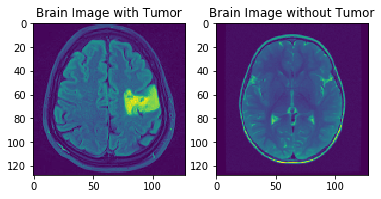

In [9]:
# Pick up the random image
random_with_tumor_image_idx = randint(0, len(yes_images)+1)
random_without_tumor_image_idx = randint(len(yes_images)+1, len(all_images))

%matplotlib inline    
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(all_images[random_with_tumor_image_idx])
ax1.set_title('Brain Image with Tumor')
ax2.imshow(all_images[random_without_tumor_image_idx])
ax2.set_title('Brain Image without Tumor')

In [10]:
# Reshaping the size of input image to feed to CNN

X = all_images.reshape(all_images.shape[0],all_images.shape[1],all_images.shape[2],1)

In [11]:
X.shape

(253, 128, 128, 1)

In [12]:
y.shape

(253,)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1),padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.45))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))




W1124 15:52:59.488045  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1124 15:52:59.524605  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1124 15:52:59.531659  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1124 15:52:59.561431  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1124 15:52:59.566442  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133:

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
__________

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['acc'])

W1124 15:52:59.878462  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1124 15:52:59.955686  9988 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1124 15:52:59.968871  9988 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
model.fit(X_train,
         y_train,
         batch_size=128,
         epochs=100)

Epoch 1/100
202/202 [==============================] - 9s 42ms/step - loss: 2.4008 - acc: 0.5990
Epoch 2/100
202/202 [==============================] - 4s 20ms/step - loss: 1.1965 - acc: 0.5446
Epoch 3/100
202/202 [==============================] - 4s 21ms/step - loss: 0.9439 - acc: 0.3861
Epoch 4/100
202/202 [==============================] - 4s 21ms/step - loss: 0.6633 - acc: 0.5792
Epoch 5/100
202/202 [==============================] - 4s 22ms/step - loss: 0.5903 - acc: 0.7624
Epoch 6/100
202/202 [==============================] - 4s 22ms/step - loss: 0.5850 - acc: 0.6436
Epoch 7/100
202/202 [==============================] - 4s 21ms/step - loss: 0.5801 - acc: 0.6238
Epoch 8/100
202/202 [==============================] - 4s 21ms/step - loss: 0.5740 - acc: 0.6287
Epoch 9/100
202/202 [==============================] - 4s 22ms/step - loss: 0.5645 - acc: 0.6386
Epoch 10/100
202/202 [==============================] - 4s 22ms/step - loss: 0.5506 - acc: 0.7228
Epoch 11/100
202/202 [=======

202/202 [==============================] - 4s 22ms/step - loss: 0.0387 - acc: 0.9851
Epoch 85/100
202/202 [==============================] - 5s 23ms/step - loss: 0.0264 - acc: 1.0000
Epoch 86/100
202/202 [==============================] - 4s 22ms/step - loss: 0.0336 - acc: 0.9901
Epoch 87/100
202/202 [==============================] - 5s 24ms/step - loss: 0.0165 - acc: 0.9950
Epoch 88/100
202/202 [==============================] - 5s 22ms/step - loss: 0.0302 - acc: 1.0000
Epoch 89/100
202/202 [==============================] - 5s 23ms/step - loss: 0.0172 - acc: 0.9950
Epoch 90/100
202/202 [==============================] - 4s 22ms/step - loss: 0.0209 - acc: 0.9901
Epoch 91/100
202/202 [==============================] - 4s 22ms/step - loss: 0.0078 - acc: 1.0000
Epoch 92/100
202/202 [==============================] - 4s 21ms/step - loss: 0.0138 - acc: 1.0000
Epoch 93/100
202/202 [==============================] - 4s 22ms/step - loss: 0.0200 - acc: 0.9950
Epoch 94/100
202/202 [===========

In [18]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7647058870278153


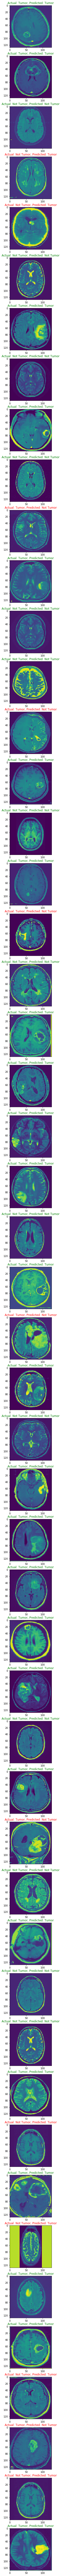

In [23]:
# Prediction 

# Following code shows if the images are "Correctly Predicted" or "Incorrectly Predicted"

y_pred = model.predict(X_test)

y_pred = np.array(list(map(int,np.around(np.squeeze(y_pred)))))

figure = plt.figure(figsize=(200, 200))

for i in range(1, len(y_pred) + 1):
    plt.subplot(len(y_pred), 1, i)
    plt.imshow(np.squeeze(X_test[i-1]))
    
    if(y_test[i-1]==0 and y_pred[i-1]==0):
        plt.title("Actual: {}, Predicted: {}".format("Not Tumor","Not Tumor"),color='green')
    elif(y_test[i-1]==0 and y_pred[i-1]==1):
        plt.title("Actual: {}, Predicted: {}".format("Not Tumor","Tumor"),color="red")
    elif(y_test[i-1]==1 and y_pred[i-1]==0):
        plt.title("Actual: {}, Predicted: {}".format("Tumor","Not Tumor"),color='red')
    elif(y_test[i-1]==1 and y_pred[i-1]==1):
        plt.title("Actual: {}, Predicted: {}".format("Tumor","Tumor"),color="green")

In [ ]:
model.save('BrainTumor_Detection 88 Percent accuracy.h5')